<a href="https://colab.research.google.com/github/joanby/tensorflow2/blob/master/Colab%203%20-%20Crear%20una%20Red%20Neuronal%20Artificial%20en%20TensorFlow%202.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<p align="center">
  <img src="https://storage.googleapis.com/kaggle-datasets-images/2243/3791/9384af51de8baa77f6320901f53bd26b/dataset-cover.png" />
  Imagen cortesía de: https://www.kaggle.com/
</p>

## Paso 1: Instalar las dependencias y configurar el entorno de GPU

In [54]:
#!pip install tensorflow-gpu==2.3.0
%tensorflow_version 2.x

## Paso 2: Importar las dependencias necesarias para el proyecto

In [55]:
import numpy as np
import datetime
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [56]:
tf.__version__

'2.7.0'

## Paso 3: Pre procesado de datos



### Cargar el dataset

In [80]:
#Cargar el dataset Fashion Mnist 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [58]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

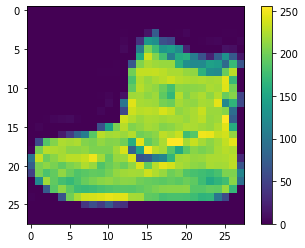

In [59]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

### Normalizar las imágenes

Se divide cada imagen en los conjunto de entrenamiento y  de testing entre el valor máximo de cada uno de los píxeles (255).

De este modo, cada píxel se hallará en el rango [0, 1]. Al normalizar las imágenes, nos aseguramos que nuestro modelo de RNA entrenará más rápidamente.

In [60]:
X_train = X_train / 255.0

In [61]:
X_test = X_test / 255.0

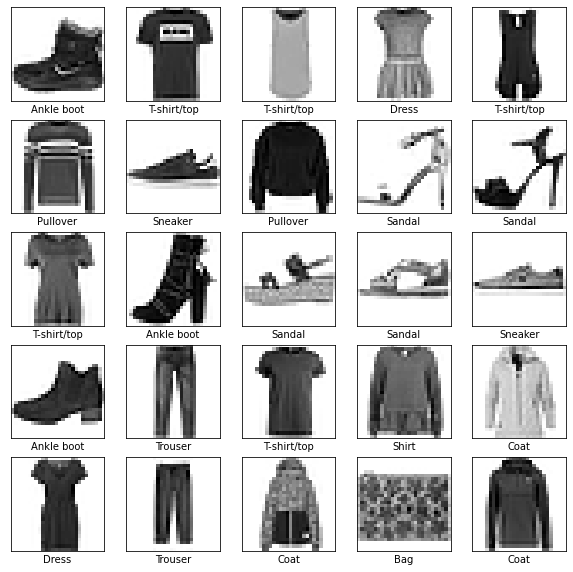

In [62]:

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

### Redimensionar el dataset

Como vamos a utilizar una red neuronal totalmente conectada, vamos a redimensionar los subconjuntos de entrenamiento y testing a formato de vector en lugar de en formato de matriz.

In [63]:
#Como cada imagen tiene 28x28 píxeles, usamos la función reshape en todo el dataset de entrenamiento para convertirlo 
# en vectores de tamaño [-1 (todos los elementos), anchura * altura]
X_train = X_train.reshape(-1, 28*28)


In [64]:
X_train.shape

(60000, 784)

In [65]:
#Redimensionamos el conjunto de testing del mismo modo
X_test = X_test.reshape(-1, 28*28)

## Paso 4: Construir la Red Neuronal Artificial

### Definir el modelo

Simplemente se define un objeto de modelo Sequential.

In [66]:
model = tf.keras.models.Sequential()

### Añadir la primera capa totalmente conectada (capa Densa)

Hyper-parametros de la capa:
- número de unidades/neuronas: 128
- función de activación: ReLU
- input_shape: (784, )

In [67]:
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784, )))

### Añadir una capa de Dropout 

Dropout es una técnica de Regularization donde aleatoriamente se asignan a ciertas neuronas de la red el valor cero. De este modo, mientras se entrena, estas neuronas no actualizarán sus valores. Al tener cierto porcentaje de neuronas sin actualizar, el proceso de entrenamiento toma más tiempo pero por contra tenemos menos posibilidades de sufrir overfitting.

In [68]:
model.add(tf.keras.layers.Dropout(0.2))

### Añadir la segunda capa (capa de salida)

- unidades: número de clases (10 en el caso del Fashion MNIST)
- función de activación: 'softmax' (probabilidades de cada clase)

In [69]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

### Compilar el modelo

- Optimizer: Adam
- Loss: Sparse softmax (categorical) crossentropy 

In [70]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [71]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Entrenar el modelo

In [73]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3926 - sparse_categorical_accuracy: 0.8583
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3617 - sparse_categorical_accuracy: 0.8681
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3457 - sparse_categorical_accuracy: 0.8725
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3285 - sparse_categorical_accuracy: 0.8787
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3176 - sparse_categorical_accuracy: 0.8822
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3036 - sparse_categorical_accuracy: 0.8868
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2997 - sparse_categorical_accuracy: 0.8888
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2879 - sparse_categorical_accuracy: 0.8929
Epoch 9/20
1875/1875 [==========

### Evaluación del modelo y predicción

In [74]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3406 - sparse_categorical_accuracy: 0.8877


In [75]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.8877000212669373


In [76]:
predictions = model.predict(X_test)
np.argmax(predictions[0])

9

In [77]:
print('Se predice que será : ' +  class_names[9])

Se predice que será : Ankle boot


In [78]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

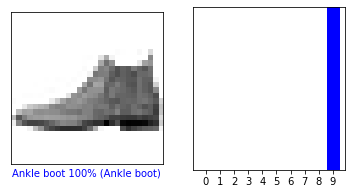

In [81]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

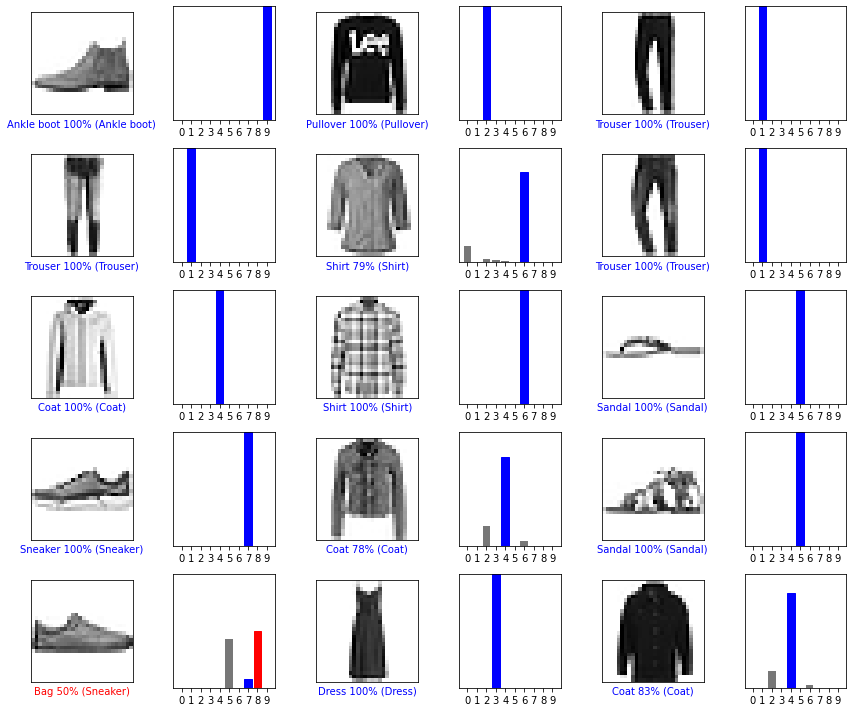

In [82]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

## Paso 5 : Guardar el modelo

### Guardar la arquitectura (topoligía) de la red neuronal

In [83]:
model_json = model.to_json()
with open("fashion_model.json", "w") as json_file:
    json_file.write(model_json)

### Guardar los pesos de la red neuronal

In [84]:
model.save_weights("fashion_model.h5")